In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import kagglehub
from IPython.display import Image
import cv2

## [Garbage Dataset](https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2)

-   Metal: 1020
-   Glass: 3061
-   Biological: 997
-   Paper: 1680
-   Battery: 944
-   Trash: 947
-   Cardboard: 1825
-   Shoes: 1977
-   Clothes: 5327
-   Plastic: 1984

## [Garbage Classification](https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification)

-   Cardboard: 393
-   Glass: 491
-   Metal: 400
-   Paper: 584
-   Plastic: 472
-   Trash: 127

## [Recyclable and Household Waste Classification](https://www.kaggle.com/datasets/alistairking/recyclable-and-household-waste-classification)

-   Default (**Disregard?**)
-   Real World
    -   Plastic
        -   plastic_cup_lids
        -   plastic_detergent_bottles
        -   plastic_food_containers
        -   plastic_shopping_bags
        -   plastic_soda_bottles
        -   plastic_straws
        -   plastic_trash_bags
        -   plastic_water_bottles
        -   disposable_plastic_cutlery
    -   Paper and Cardboard
        -   cardboard_boxes
        -   cardboard_packaging
        -   magazines
        -   newspaper
        -   office_paper
        -   paper_cups
    -   Glass
        -   glass_beverage_bottles
        -   glass_food_jars
        -   glass_cosmetic_containers
    -   Metal
        -   aerosol_cans
        -   aluminum_food_cans
        -   aluminum_soda_cans
        -   steel_food_cans
    -   Organic Waste
        -   eggshells
        -   coffee_grounds
        -   food_waste
        -   tea_bags
    -   Textiles
        -   clothing
        -   shoes
    -   Other / Unclear
        -   styrofoam_cups
        -   styrofoam_food_containers


In [ ]:
garbage_classification = kagglehub.dataset_download(
    "asdasdasasdas/garbage-classification"
)

print("Path to dataset files:", garbage_classification)

garbage_dataset = kagglehub.dataset_download("sumn2u/garbage-classification-v2")

print("Path to dataset files:", garbage_dataset)

household_waste = kagglehub.dataset_download(
    "alistairking/recyclable-and-household-waste-classification"
)

print("Path to dataset files:", household_waste)

100%|██████████| 82.0M/82.0M [00:00<00:00, 119MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/asdasdasasdas/garbage-classification/versions/2
Path to dataset files: /kaggle/input/garbage-classification-v2


100%|██████████| 920M/920M [00:09<00:00, 97.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1


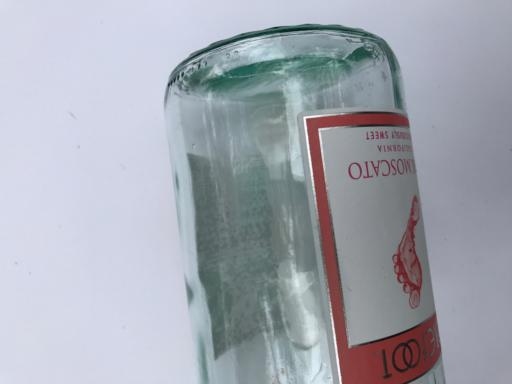

In [ ]:
Image(
    filename=f"{garbage_classification}/garbage classification/Garbage classification/glass/glass101.jpg"
)  # garbage-classification glass image

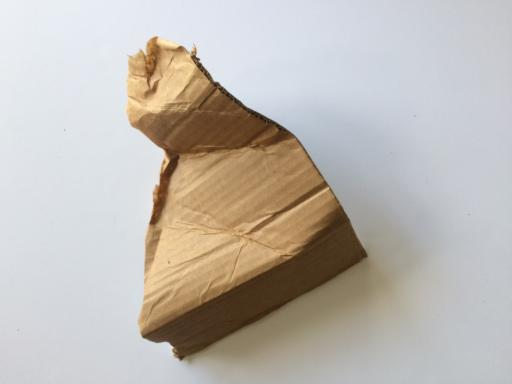

In [ ]:
Image(
    filename=f"{garbage_dataset}/garbage-dataset/cardboard/cardboard_1002.jpg"
)  # garbage-classification-v2 cardboard image

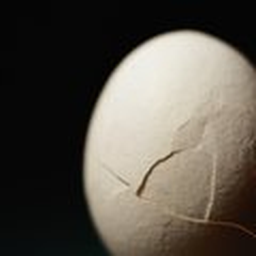

In [ ]:
Image(
    filename=f"{household_waste}/images/images/eggshells/real_world/Image_112.png"
)  # recyclable-and-household-waste-classification eggshell image

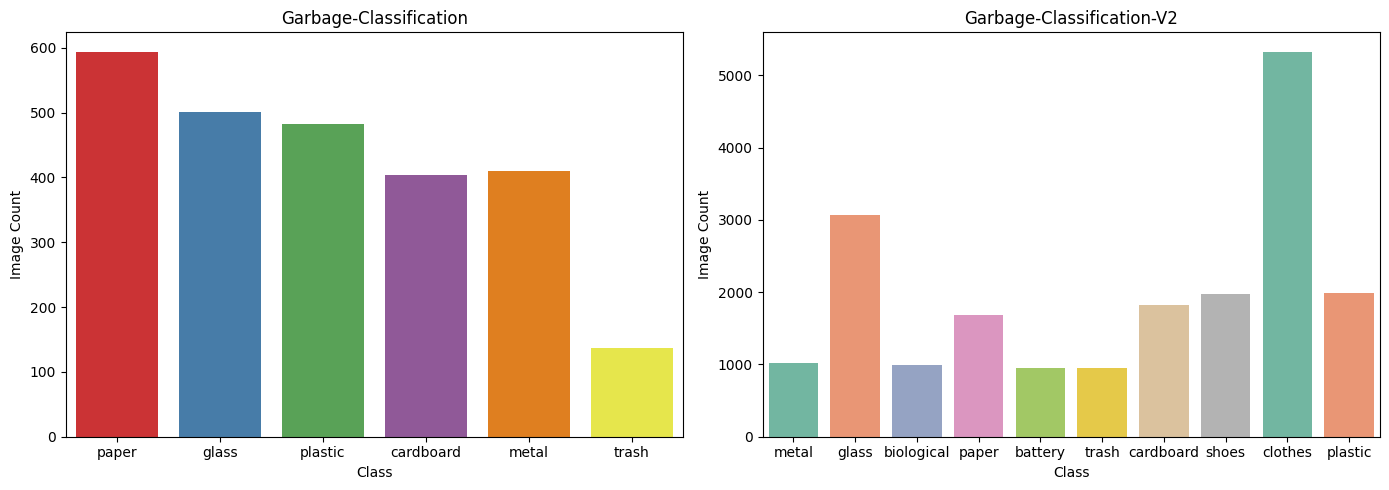

In [ ]:
# Dataset 1
data_dir1 = f"{garbage_classification}/garbage classification/Garbage classification"
classes1 = [
    d for d in os.listdir(data_dir1) if os.path.isdir(os.path.join(data_dir1, d))
]
counts1 = {cls: len(os.listdir(os.path.join(data_dir1, cls))) for cls in classes1}
df1 = pd.DataFrame(list(counts1.items()), columns=["Class", "Image Count"])

# Dataset 2
data_dir2 = f"{garbage_dataset}/garbage-dataset"
classes2 = [
    d for d in os.listdir(data_dir2) if os.path.isdir(os.path.join(data_dir2, d))
]
counts2 = {cls: len(os.listdir(os.path.join(data_dir2, cls))) for cls in classes2}
df2 = pd.DataFrame(list(counts2.items()), columns=["Class", "Image Count"])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dataset 1
sns.barplot(
    data=df1, x="Class", y="Image Count", palette="Set1", ax=axes[0], hue="Class"
)
axes[0].set_title("Garbage-Classification")

# Dataset 2
sns.barplot(
    data=df2, x="Class", y="Image Count", palette="Set2", ax=axes[1], hue="Class"
)
axes[1].set_title("Garbage-Classification-V2")

plt.tight_layout()
plt.show()

In [ ]:
# Dataset 3: real_world images grouped by main category
data_dir3 = f"{household_waste}/images/images"
classes3 = [
    d for d in os.listdir(data_dir3) if os.path.isdir(os.path.join(data_dir3, d))
]

category_map = {
    # Plastic
    "plastic_cup_lids": "Plastic",
    "plastic_detergent_bottles": "Plastic",
    "plastic_food_containers": "Plastic",
    "plastic_shopping_bags": "Plastic",
    "plastic_soda_bottles": "Plastic",
    "plastic_straws": "Plastic",
    "plastic_trash_bags": "Plastic",
    "plastic_water_bottles": "Plastic",
    "disposable_plastic_cutlery": "Plastic",
    "styrofoam_cups": "Plastic",
    "styrofoam_food_containers": "Plastic",
    # Paper and Cardboard
    "cardboard_boxes": "Paper&Cardboard",
    "cardboard_packaging": "Paper&Cardboard",
    "magazines": "Paper&Cardboard",
    "newspaper": "Paper&Cardboard",
    "office_paper": "Paper&Cardboard",
    "paper_cups": "Paper&Cardboard",
    # Glass
    "glass_beverage_bottles": "Glass",
    "glass_food_jars": "Glass",
    "glass_cosmetic_containers": "Glass",
    # Metal
    "aerosol_cans": "Metal",
    "aluminum_food_cans": "Metal",
    "aluminum_soda_cans": "Metal",
    "steel_food_cans": "Metal",
    # Organic Waste
    "eggshells": "Organic Waste",
    "coffee_grounds": "Organic Waste",
    "food_waste": "Organic Waste",
    "tea_bags": "Organic Waste",
    # Textiles
    "clothing": "Textiles",
    "shoes": "Textiles",
}

counts3 = {}
for cls in classes3:
    real_world_path = os.path.join(data_dir3, cls, "real_world")
    if os.path.exists(real_world_path):
        counts3[cls] = len(os.listdir(real_world_path))

df3 = pd.DataFrame(list(counts3.items()), columns=["Subclass", "Image Count"])
df3["Category"] = df3["Subclass"].map(category_map)
df3_grouped = df3.groupby("Category")["Image Count"].sum().reset_index()

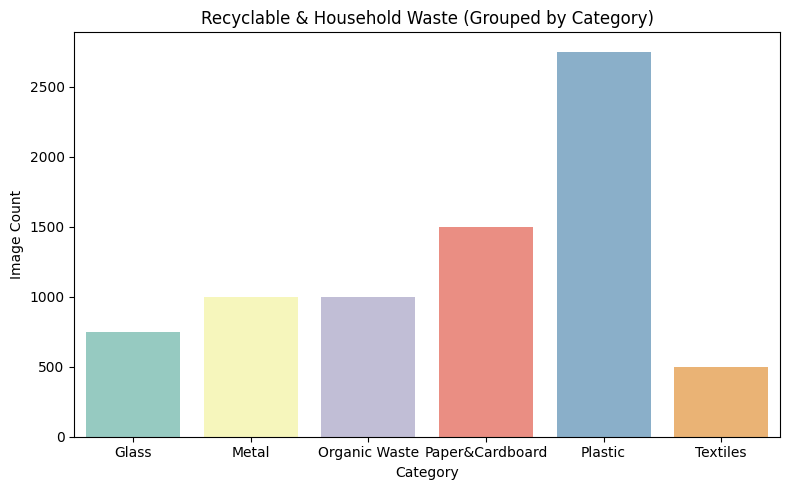

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df3_grouped, x="Category", y="Image Count", palette="Set3", hue="Category"
)
plt.title("Recyclable & Household Waste (Grouped by Category)")
plt.tight_layout()
plt.show()

In [ ]:
map_gc = {
    "cardboard": "Paper/Cardboard",
    "glass": "Glass",
    "metal": "Metal",
    "paper": "Paper/Cardboard",
    "plastic": "Plastic",
    "trash": "Trash",
}

map_gd = {
    "metal": "Metal",
    "glass": "Glass",
    "biological": "Organic Waste",
    "paper": "Paper/Cardboard",
    "battery": "Battery",
    "trash": "Trash",
    "cardboard": "Paper/Cardboard",
    "shoes": "Textiles",
    "clothes": "Textiles",
    "plastic": "Plastic",
}

map_hw = {
    # Plastic
    "plastic_cup_lids": "Plastic",
    "plastic_detergent_bottles": "Plastic",
    "plastic_food_containers": "Plastic",
    "plastic_shopping_bags": "Plastic",
    "plastic_soda_bottles": "Plastic",
    "plastic_straws": "Plastic",
    "plastic_trash_bags": "Plastic",
    "plastic_water_bottles": "Plastic",
    "disposable_plastic_cutlery": "Plastic",
    "styrofoam_cups": "Plastic",
    "styrofoam_food_containers": "Plastic",
    # Paper and Cardboard
    "cardboard_boxes": "Paper/Cardboard",
    "cardboard_packaging": "Paper/Cardboard",
    "magazines": "Paper/Cardboard",
    "newspaper": "Paper/Cardboard",
    "office_paper": "Paper/Cardboard",
    "paper_cups": "Paper/Cardboard",
    # Glass
    "glass_beverage_bottles": "Glass",
    "glass_food_jars": "Glass",
    "glass_cosmetic_containers": "Glass",
    # Metal
    "aerosol_cans": "Metal",
    "aluminum_food_cans": "Metal",
    "aluminum_soda_cans": "Metal",
    "steel_food_cans": "Metal",
    # Organic Waste
    "eggshells": "Organic Waste",
    "coffee_grounds": "Organic Waste",
    "food_waste": "Organic Waste",
    "tea_bags": "Organic Waste",
    # Textiles
    "clothing": "Textiles",
    "shoes": "Textiles",
}

In [24]:
# from shutil import rmtree
# rmtree("/content/unified_dataset")

In [ ]:
import os
import shutil
import cv2
from tqdm import tqdm

out_dir = "/content/unified_dataset"
os.makedirs(out_dir, exist_ok=True)

# Counter to ensure unique filenames
counter = {"gc": 0, "gd": 0, "hw": 0}


def normalize_label(label: str) -> str:
    return label.lower().replace("/", "_").replace("&", "_").replace(" ", "_")


def resize_and_copy(src, dst_dir, name_prefix, ext=".jpg", size=(224, 224)):
    global counter
    os.makedirs(dst_dir, exist_ok=True)
    img = cv2.imread(src)
    if img is not None:
        img = cv2.resize(img, size)
        idx = counter[name_prefix]
        new_name = f"image_{idx:05d}_{name_prefix}{ext}"
        dst_path = os.path.join(dst_dir, new_name)
        cv2.imwrite(dst_path, img)
        counter[name_prefix] += 1


# Dataset 1: Garbage Classification
for cls, unified_cls in map_gc.items():
    src_dir = os.path.join(
        garbage_classification, "garbage classification/Garbage classification", cls
    )
    unified_cls = normalize_label(unified_cls)
    dst_dir = os.path.join(out_dir, unified_cls)
    for fname in tqdm(os.listdir(src_dir), desc=f"GC: {cls}"):
        resize_and_copy(os.path.join(src_dir, fname), dst_dir, name_prefix="gc")

# Dataset 2: Garbage Dataset V2
for cls, unified_cls in map_gd.items():
    src_dir = os.path.join(garbage_dataset, "garbage-dataset", cls)
    unified_cls = normalize_label(unified_cls)
    dst_dir = os.path.join(out_dir, unified_cls)
    for fname in tqdm(os.listdir(src_dir), desc=f"GD: {cls}"):
        resize_and_copy(os.path.join(src_dir, fname), dst_dir, name_prefix="gd")

# Dataset 3: Household Waste
for subclass, unified_cls in map_hw.items():
    real_dir = os.path.join(household_waste, "images/images", subclass, "real_world")
    if not os.path.exists(real_dir):
        continue
    unified_cls = normalize_label(unified_cls)
    dst_dir = os.path.join(out_dir, unified_cls)
    for fname in tqdm(os.listdir(real_dir), desc=f"HW: {subclass}"):
        resize_and_copy(os.path.join(real_dir, fname), dst_dir, name_prefix="hw")

HW: shoes: 100%|██████████| 250/250 [00:00<00:00, 438.81it/s]


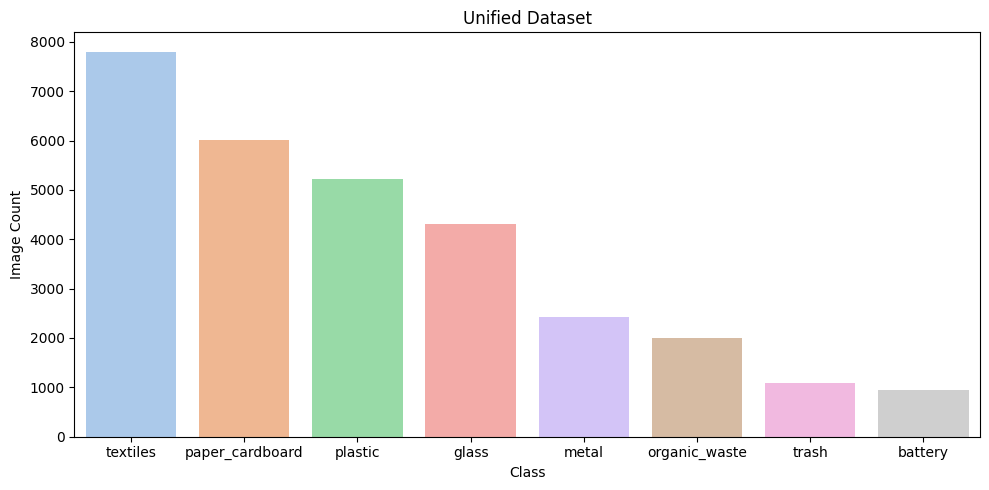

In [ ]:
data_dir = "/content/unified_dataset/"
classes = sorted(
    [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
)
counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
df_unified = pd.DataFrame(
    list(counts.items()), columns=["Class", "Image Count"]
).sort_values("Image Count", ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=df_unified, x="Class", y="Image Count", palette="pastel", hue="Class"
)
plt.title("Unified Dataset")
plt.tight_layout()
plt.show()

In [35]:
df_unified

,Class,Image Count
6,textiles,7804
4,paper_cardboard,6002
5,plastic,5216
1,glass,4312
2,metal,2430
3,organic_waste,1997
7,trash,1084
0,battery,944


In [36]:
# !pip install albumentations

In [ ]:
import albumentations as A
import random

TARGET = 8000  # target images per class

augment = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.3),
        A.RandomBrightnessContrast(p=0.3),
        A.Rotate(limit=30, p=0.4),
        A.Blur(blur_limit=3, p=0.2),
        A.RandomCrop(width=180, height=180, p=0.3),
        A.Resize(224, 224),
    ]
)

In [ ]:
for _, row in df_unified.iterrows():
    cls = row["Class"]
    current_count = row["Image Count"]
    if current_count >= TARGET:
        print(f"{cls}: already has {current_count} images, skipping.")
        continue

    cls_dir = os.path.join(data_dir, cls)
    images = [f for f in os.listdir(cls_dir)]
    needed = TARGET - current_count
    idx = current_count

    print(f"Augmenting '{cls}': {current_count} → {TARGET}")

    pbar = tqdm(total=needed)
    while needed > 0:
        img_name = random.choice(images)
        img_path = os.path.join(cls_dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        augmented = augment(image=img)["image"]
        new_name = f"image_{idx:05d}_aug.jpg"
        cv2.imwrite(os.path.join(cls_dir, new_name), augmented)

        idx += 1
        needed -= 1
        pbar.update(1)
    pbar.close()

Augmenting 'textiles': 7804 → 8000


100%|██████████| 196/196 [00:00<00:00, 743.82it/s]


Augmenting 'paper_cardboard': 6002 → 8000


100%|██████████| 1998/1998 [00:02<00:00, 806.51it/s]


Augmenting 'plastic': 5216 → 8000


100%|██████████| 2784/2784 [00:03<00:00, 833.52it/s]


Augmenting 'glass': 4312 → 8000


100%|██████████| 3688/3688 [00:04<00:00, 806.18it/s]


Augmenting 'metal': 2430 → 8000


100%|██████████| 5570/5570 [00:07<00:00, 779.86it/s]


Augmenting 'organic_waste': 1997 → 8000


100%|██████████| 6003/6003 [00:09<00:00, 621.81it/s]


Augmenting 'trash': 1084 → 8000


100%|██████████| 6916/6916 [00:08<00:00, 782.08it/s]


Augmenting 'battery': 944 → 8000


100%|██████████| 7056/7056 [00:08<00:00, 877.31it/s]


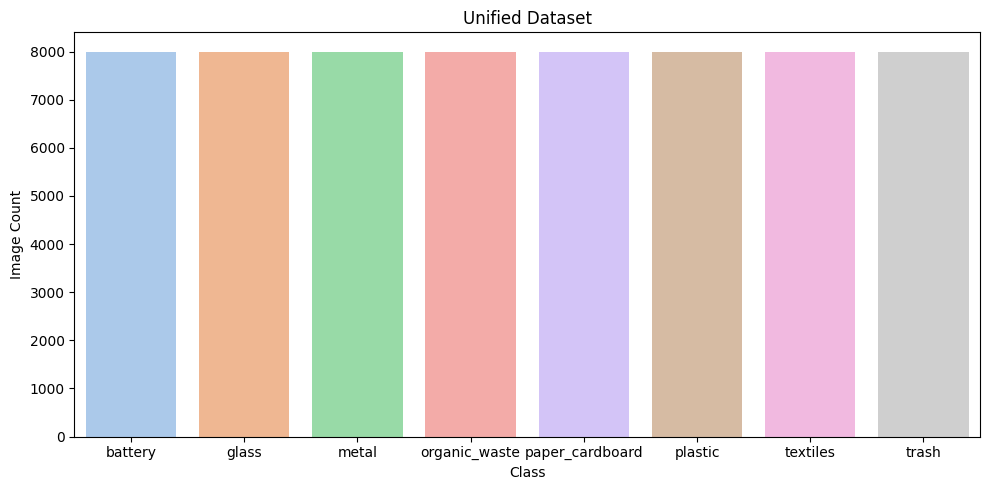

In [ ]:
classes = sorted(
    [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
)
counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
df_unified = pd.DataFrame(
    list(counts.items()), columns=["Class", "Image Count"]
).sort_values("Image Count", ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=df_unified, x="Class", y="Image Count", palette="pastel", hue="Class"
)
plt.title("Unified Dataset")
plt.tight_layout()
plt.show()

In [ ]:
!zip -r /content/unified_dataset.zip /content/unified_dataset/

Streaming output truncated to the last 5000 lines.
  adding: content/unified_dataset/organic_waste/image_04298_gd.jpg (deflated 1%)
  adding: content/unified_dataset/organic_waste/image_02145_aug.jpg (deflated 2%)
  adding: content/unified_dataset/organic_waste/image_06112_hw.jpg (deflated 3%)
  adding: content/unified_dataset/organic_waste/image_02464_aug.jpg (deflated 1%)
  adding: content/unified_dataset/organic_waste/image_05770_aug.jpg (deflated 1%)
  adding: content/unified_dataset/organic_waste/image_04469_gd.jpg (deflated 1%)
  adding: content/unified_dataset/organic_waste/image_07826_aug.jpg (deflated 4%)
  adding: content/unified_dataset/organic_waste/image_02088_aug.jpg (deflated 1%)
  adding: content/unified_dataset/organic_waste/image_04687_gd.jpg (deflated 1%)
  adding: content/unified_dataset/organic_waste/image_07374_aug.jpg (deflated 4%)
  adding: content/unified_dataset/organic_waste/image_04017_aug.jpg (deflated 2%)
  adding: content/unified_dataset/organic_waste/ima

In [ ]:
from google.colab import files

files.download("/content/unified_dataset.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>